In [ ]:
# https://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [23]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [24]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

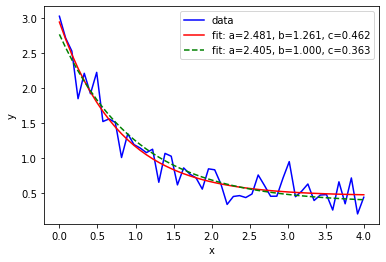

In [35]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])


LinearRegression()

In [4]:
reg.coef_

array([0.5, 0.5])

In [ ]:
# Non-negative least squares

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [7]:
# Generate random data
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [9]:
# fit the non-negative square
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

TypeError: __init__() got an unexpected keyword argument 'positive'

In [10]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700343


NameError: name 'reg_nnls' is not defined

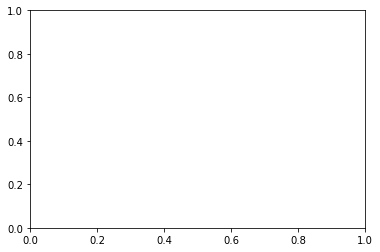

In [11]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata)

In [ ]:
# https://astrofrog.github.io/py4sci/_static/15.%20Fitting%20models%20to%20data.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

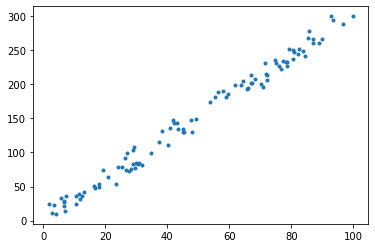

In [2]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [ ]:
def line(x, a, b):
    return a * x + b

In [ ]:
popt, pcov = curve_fit(line, x, y)

In [ ]:
popt

In [ ]:
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt="none")

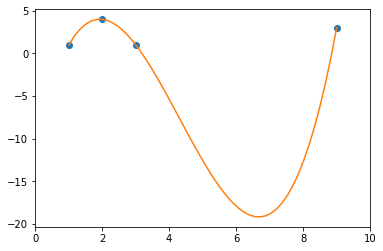

In [3]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

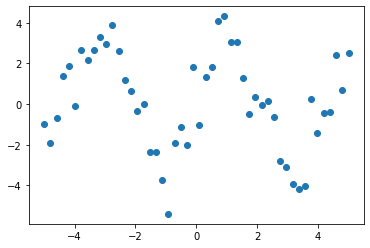

In [5]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [6]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


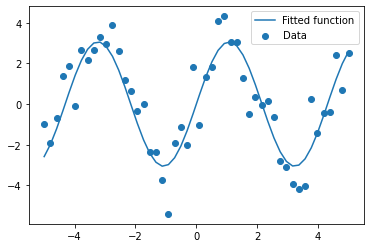

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [ ]:
# https://www.mygreatlearning.com/blog/binary-search-algorithm/

In [ ]:
# iterative

In [ ]:
def it_binarySearch(mylist, target):
        first = 0
        last = len(mylist)-1

        while first<=last:
            #note: Use of // indicates floor division. Ex. 5//2 = 2
            midpoint = (first + last)//2
            if mylist[midpoint] == target:
                return midpoint
            else:
                if target < mylist[midpoint]:
                    last = midpoint-1
                else:
                    first = midpoint+1

        return None

test_list = [0,3,4,7,9,11,34,46,57,65]
print(it_binarySearch(test_list, 4))
print(it_binarySearch(test_list, 30))
print(it_binarySearch(test_list, 57))

In [ ]:
# https://brilliant.org/wiki/binary-search/

In [ ]:
# recursive

In [ ]:
def binary_search_recursive(listOfInts, elem, start=0, end=None):
    if end is None:
        end = len(listOfInts) - 1
    if start > end:
        return 'Value not found in list'

    mid = (start + end) // 2
    if elem == listOfInts[mid]:
        return mid
    if elem < listOfInts[mid]:
        return binary_search_recursive(listOfInts, elem, start, mid-1)
    # elem > listOfInts[mid]
    return binary_search_recursive(listOfInts, elem, mid+1, end)

listOfInts = [0,1,2,3,4,5,22,33,45]

print (binary_search_recursive(listOfInts, 22))

In [ ]:
# Function to determine if a `target` exists in the sorted list `nums`
# or not using a binary search algorithm
def binarySearch(nums, target):
 
    # search space is nums[left…right]
    (left, right) = (0, len(nums) - 1)
 
    # loop till the search space is exhausted
    while left <= right:
 
        # find the mid-value in the search space and
        # compares it with the target
 
        mid = (left + right) // 2
 
        # overflow can happen. Use:
        # mid = left + (right - left) / 2
        # mid = right - (right - left) // 2
 
        # target is found
        if target == nums[mid]:
            return mid
 
        # discard all elements in the right search space,
        # including the middle element
        elif target < nums[mid]:
            right = mid - 1
 
        # discard all elements in the left search space,
        # including the middle element
        else:
            left = mid + 1
 
    # `target` doesn't exist in the list
    return -1
 
 
if __name__ == '__main__':
 
    nums = [2, 5, 6, 8, 9, 10]
    target = 5
 
    index = binarySearch(nums, target)
 
    if index != -1:
        print('Element found at index', index)
    else:
        print('Element found not in the list')
 


In [ ]:
# Recursive implementation of the binary search algorithm to return
# the position of `target` in subarray nums[left…right]
def binarySearch(nums, left, right, target):
 
    # Base condition (search space is exhausted)
    if left > right:
        return -1
 
    # find the mid-value in the search space and
    # compares it with the target
 
    mid = (left + right) // 2
 
    # overflow can happen. Use below
    # mid = left + (right - left) / 2
 
    # Base condition (a target is found)
    if target == nums[mid]:
        return mid
 
    # discard all elements in the right search space,
    # including the middle element
    elif target < nums[mid]:
        return binarySearch(nums, left, mid - 1, target)
 
    # discard all elements in the left search space,
    # including the middle element
    else:
        return binarySearch(nums, mid + 1, right, target)
 
 
if __name__ == '__main__':
 
    nums = [2, 5, 6, 8, 9, 10]
    target = 5
 
    (left, right) = (0, len(nums) - 1)
    index = binarySearch(nums, left, right, target)
 
    if index != -1:
        print('Element found at index', index)
    else:
        print('Element found not in the list')
 

In [13]:
from numpy import linspace, log,sin,pi
from matplotlib import pyplot as plt
from random import random
from scipy.optimize import curve_fit

In [14]:
t= linspace(0.001,5,200)
y=[]

#for i in t:
# Linear equation= y= ax+b

def linear(x,a,b):
    return a*x +b

constant =curve_fit(linear,t,y)
a_fit =constant

a_guess=5
b_guess=1.65
fit = []
for i in t:
    fit.append(linear(i,a_guess,b_guess))
    
plt.plot(t,y)
plt.plot(t,fit)
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title("Python curve fit")
plt.show

IndentationError: expected an indented block (<ipython-input-14-c0ade7d46012>, line 7)